In [1]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)

True

In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.append("../../")
import utils.utils as uti
import matplotlib.pyplot as plt

### Import data from WA

In [3]:
# Path to the uploaded CSV file and upload it
from corpus_preprocessing.preprocessWA import remove_extra_rows_WA
df_filtered_wa, conduct_cols  = remove_extra_rows_WA()
df_filtered_wa['rule16'] = np.nan

Percentage of samples kept: 69.48%


### Import data from NJ

In [4]:
from corpus_preprocessing.preprocessNJ import remove_extra_rows_NJ, extract_labels_rpc_NJ
df_filtered_nj = remove_extra_rows_NJ()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_nj.columns.values)):
    df_filtered_nj[str(i)+"_empty"] = np.nan
df_filtered_nj.columns = df_filtered_wa.columns.values

Percentage of samples kept: 11.99%


### Import data from GA

In [5]:
from corpus_preprocessing.preprocessGA import remove_extra_rows_GA
df_filtered_ga = remove_extra_rows_GA()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_ga.columns.values)):
    df_filtered_ga[str(i)+"_empty"] = np.nan
df_filtered_ga.columns = df_filtered_wa.columns.values

Percentage of rows kept: 57.32% 1042


### Import data from AZ

In [6]:
from corpus_preprocessing.preprocessAZ import preprocess_AZ
df_filtered_az = preprocess_AZ()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_az.columns.values)):
    df_filtered_az[str(i)+"_empty"] = np.nan
df_filtered_az.columns = df_filtered_wa.columns.values

Percentage of rows kept: 96.77%


### Import data from NC

In [7]:
from corpus_preprocessing.preprocessNC import preprocess_NC
df_filtered_nc = preprocess_NC()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_nc.columns.values)):
    df_filtered_nc[str(i)+"_empty"] = np.nan
df_filtered_nc.columns = df_filtered_wa.columns.values

Percentage of rows kept: 67.36% 1515


### Import data from MD

In [8]:
from corpus_preprocessing.preprocessMD import preprocess_MD
df_filtered_md = preprocess_MD()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_md.columns.values)):
    df_filtered_md[str(i)+"_empty"] = np.nan
df_filtered_md.columns = df_filtered_wa.columns.values

Percentage of rows kept: 10.95% 88


### Combine the data from the states into one DataFrame

In [9]:
df_all_states = pd.concat([df_filtered_wa.reset_index(drop=True), df_filtered_nj,
df_filtered_ga ,df_filtered_az, df_filtered_nc, df_filtered_md], axis=0, ignore_index=True)
df_all_states

,Description,rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16
0,"John A. Walsh (WSBA No. 20603, admitted 1991),...",3.4,8.4d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Louis A. Ferreira (WSBA No. 20646, admitted 19...",1.2,1.8,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Roland O. Foster Balloun (WSBA No. 20884, admi...",1.1,1.14,1.15,1.8,1.8,3.3,3.4,4.4,8.4c,8.4d,8.4l,NaN,NaN,NaN,NaN,NaN
3,"Thomas G. Batson (WSBA No. 20888, admitted 199...",1.14,8.4c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Kevin G. Healy (WSBA No. 16307, admitted 1986)...",1.8,1.8,8.4c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4550,"july 21, 2009 by the court of appeals based on...",1.1,1.15,5.1,5.3,8.4,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
4551,"the court of appeals on april 28, 2009 for lac...",1.3,3.2,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
4552,for failure to appear at his client’s hearing....,1.3,8.4,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
4553,"july 21, 2009 by the court of appeals based on...",1.1,1.15,8.4,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN


### Manually group the labels into 10 bins

In [10]:
dict_unique_conducts = {"1.1":1, "1.3":1, 
        "1.15":2, "1.15a":2, "1.15 (a)":2, "1.15A":2, "1.15 (A)":2,"1.15b":2,"1.15 (b)":2, "1.15B":2, "1.15 (B)":2,
        "1.4":3,
        "1.7":4, "1.8":4, "1.10":4, "1.11":4, "1.16":4, "1.17":4,
        "1.2":5, "1.5":5, "1.6":5, '1.9':5, "1.12":5, '1.13':5, '1.14':5,
        "2.1":6, "2.2":6, "2.3":6, "2.4":6, "3.1":6, "3.2":6, "3.3":6, "3.4":6, "3.5":6, "3.6":6, "3.7":6, "3.8":6, "3.9":6,
        "4.1":7, "4.2":7, "4.2.":7, "4.3":7, "4.4":7, "5.1":7, "5.2":7, "5.3":7, "5.4":7, "5.5":7, "5.6":7, "5.7":7,"5.8":7,
         "6.1":7, "6.2":7, "6.3":7, "6.4":7, "6.5":7, "7.1":7, "7.2":7, "7.3":7, "7.4":7, "7.5":7,"7.6":7,
        "8.4b":8, '8.4 (b)':8,
        "8.4c":9, '8.4 (c)':9,
        '8.1':10, '8.2':10, '8.4':10, '8.4a':10, '8.4 (a)':10, '8.4d':10, '8.4 (d)':10, '8.4e':10, '8.4 (e)':10, '8.4h':10, 
        '8.4 (h)':10, '8.4i':10, '8.4 (i)':10, '8.4j':10, '8.4 (j)':10, '8.4k':10, '8.4 (k)':10, '8.4l':10, '8.4 (l)':10, '8.4m':10, '8.4 (m)':10,
         '8.4n':10, '8.4 (n)':10, '8.5':10}

### Frequency labels histogram

Text(0.5, 0, 'Frequency of ABA rule')

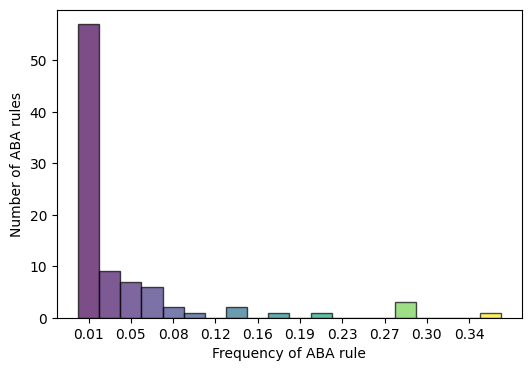

In [11]:
freq_label = []
for j, key in enumerate(dict_unique_conducts.keys()):
        # index with(out) label for test data
        mask_test = df_all_states.drop(['Description'], axis = 1).isin([key])
        test_with_label = df_all_states[mask_test].dropna(how='all').index.values.tolist()

        freq_label.append(len(test_with_label)/(len(df_all_states)))

# Number of bins
num_bins = 20

# Create histogram
plt.figure(figsize=(6, 4))
n, bins, patches = plt.hist(freq_label, bins=num_bins, edgecolor='black', alpha=0.7)

# Customize colors
colors = plt.cm.viridis(np.linspace(0, 1, len(patches)))
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

bin_midpoints = 0.5 * (bins[:-1] + bins[1:])
bin_midpoints_formatted = [f'{x:.2f}' for x in bin_midpoints]
# Select every second bin for ticks
ticks_indices = list(range(0, len(bin_midpoints), 2))  # Using list indexing

# Extracting every second bin midpoints and their labels
selected_bin_midpoints = [bin_midpoints[i] for i in ticks_indices]
selected_bin_labels = [bin_midpoints_formatted[i] for i in ticks_indices]

# Setting xticks with selected midpoints and labels
plt.xticks(selected_bin_midpoints, selected_bin_labels, rotation=0)

# Adding labels and title
plt.ylabel('Number of ABA rules')
plt.xlabel('Frequency of ABA rule')

In [12]:
# from clusters_to_bins import clusters_to_bins
# dict_unique_conducts = clusters_to_bins("cluster_sums.csv")

### Replace labels by corresponding bin identificators

In [13]:
unique_bins = list(set(dict_unique_conducts.values()))
df_all_states = df_all_states.replace(dict_unique_conducts)
df_all_states

/var/folders/sv/qn9ckc8d6bs84hdk8qfbjcgh0000gn/T/ipykernel_83881/3471764644.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_all_states = df_all_states.replace(dict_unique_conducts)


,Description,rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16
0,"John A. Walsh (WSBA No. 20603, admitted 1991),...",6.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Louis A. Ferreira (WSBA No. 20646, admitted 19...",5.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Roland O. Foster Balloun (WSBA No. 20884, admi...",1.0,5.0,2.0,4.0,4.0,6.0,6.0,7.0,9.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN
3,"Thomas G. Batson (WSBA No. 20888, admitted 199...",5.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Kevin G. Healy (WSBA No. 16307, admitted 1986)...",4.0,4.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4550,"july 21, 2009 by the court of appeals based on...",1.0,2.0,7.0,7.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4551,"the court of appeals on april 28, 2009 for lac...",1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4552,for failure to appear at his client’s hearing....,1.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4553,"july 21, 2009 by the court of appeals based on...",1.0,2.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Frequency bins histogram

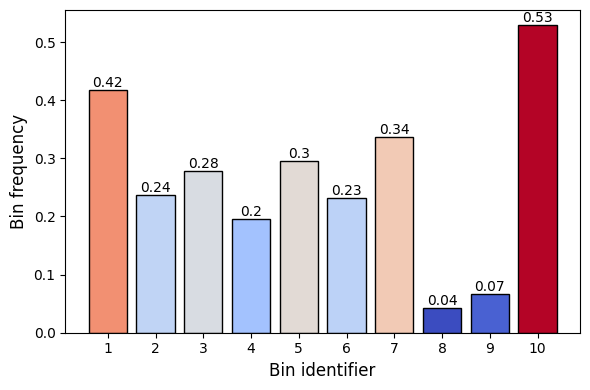

In [14]:
freq_bins = []
for j, key in enumerate(unique_bins):
        # index with(out) label for test data
        mask_test = df_all_states.drop(['Description'], axis = 1).isin([key])
        test_with_label = df_all_states[mask_test].dropna(how='all').index.values.tolist()

        freq_bins.append(len(test_with_label)/(len(df_all_states)))

import matplotlib.cm as cm

fig, ax = plt.subplots(figsize=(6, 4))

# Create bar plot
colors = cm.coolwarm((np.array(freq_bins) - min(freq_bins)) / (max(freq_bins) - min(freq_bins)))
bars = ax.bar(unique_bins, freq_bins, color=colors, edgecolor='black')

# Add labels and title
ax.set_xlabel('Bin identifier', fontsize=12)
ax.set_ylabel('Bin frequency', fontsize=12)

# Add gridlines


# Add data labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

ax.set_xticks(np.arange(len(unique_bins))+1) 
ax.set_xticklabels(unique_bins)
# Show plot
plt.tight_layout()
plt.show()

### Preprocess Descriptions

In [15]:
# Preprocess data by converting text to lowercase, removing non-word characters and numbers, 
# excluding the specific word 'wsba', exclude single characters, tokenizing, removing stopwords, and applying lemmatization or stemming if method = "stemming"

preprocessor = uti.TextPreprocessor(method='lemmatization')
preprocessed_descriptions = df_all_states['Description'].apply(preprocessor.preprocess)
preprocessed_descriptions


0       john walsh admit seattle order censure pursuan...
1       louis ferreira admit vancouver receive censure...
2       roland foster balloun admit disbar follow hear...
3       thomas batson admit seattle disbar order supre...
4       kevin healy admit seattle resign lieu disbarme...
                              ...                        
4550    july court appeal base misconduct management c...
4551    court appeal april lack diligence failure expe...
4552    failure appear client hearing order appear jud...
4553    july court appeal base misconduct settlement a...
4554    filing two motion recuse judge federal lawsuit...
Name: Description, Length: 4555, dtype: object

### Classification using logistic regression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


In [17]:
scores = np.zeros([len(unique_bins)])

for j, label in enumerate(unique_bins):
    # index with(out) label for test data
    mask_test = df_all_states[conduct_cols].isin([label])
    with_label = df_all_states[mask_test].dropna(how='all').index.values.tolist()
    without_label = np.setdiff1d(np.array(preprocessed_descriptions.index),np.array(with_label))

    y = pd.DataFrame(np.append(np.ones(len(with_label)), np.zeros(len(without_label))),index = np.append(with_label, without_label))
    X_train, X_test, y_train, y_test = train_test_split(preprocessed_descriptions, y, test_size=0.2, random_state=42)

    tfidf_vectorizer = TfidfVectorizer()
    tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)
    tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

        # run logistic regression on train data
    logreg=LogisticRegression()
    logreg.fit(tfidf_train_vectors, np.ravel(y_train.values))

        # estimate the accuracy of the model
    scores[j] = logreg.score(tfidf_test_vectors, y_test)

### Accuracy estimation of the log regression model

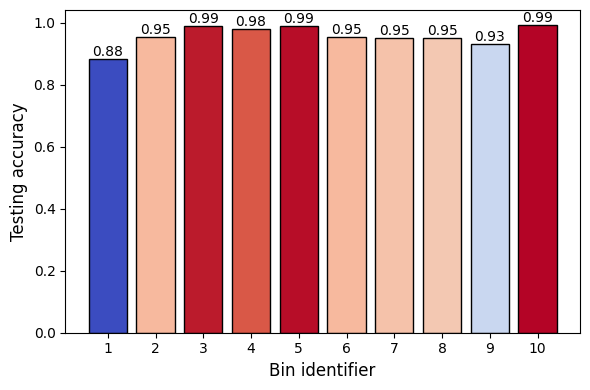

In [18]:
# Create a new figure with two subplots (side by side) including the exact frequency labels on top
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=(6, 4))

# Create bar plot
colors = cm.coolwarm((np.array(scores) - min(scores)) / (max(scores) - min(scores)))
bars = ax.bar(unique_bins, scores, color=colors, edgecolor='black')

# Add labels and title
ax.set_xlabel('Bin identifier', fontsize=12)
ax.set_ylabel('Testing accuracy', fontsize=12)

# Add gridlines


# Add data labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

ax.set_xticks(np.arange(len(unique_bins))+1) 
ax.set_xticklabels(unique_bins)
# Show plot
plt.tight_layout()
plt.show()

In [19]:
np.mean(scores)

0.957409440175631

In [20]:
872/len(df_all_states)

0.19143798024149286